In [1]:
import pandas as pds
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ls

confidentiality-agreement_Heidt.pdf  MOU_Chris_Heidt_signed.pdf
flask_dev_setup2.ipynb               NOAA_codes.txt
flask_dev_setup.ipynb                run.py*
flaskexample/                        SD_Data_Explore.ipynb
insight.csv                          SD_weather_daily.csv
insight-full.csv                     SD_weather_daily.ods
insight_share/                       tmp/
insight_share.zip                    Untitled.ipynb
Jan 15 2018.ipynb                    Weather_Underground_Interface.ipynb
__MACOSX/


In [3]:
df = pds.read_csv('insight-full.csv', header=0)

/home/chris/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df['disp_problem_lvl'].unique()

array(['L1', 'L3', 'L4', 'UNKNOWN', 'L2'], dtype=object)

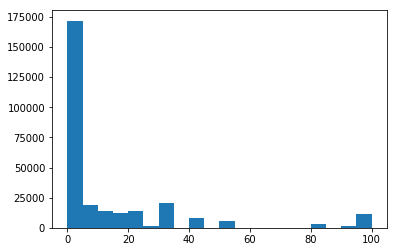

In [13]:
plt.hist(df['trans_score'][df['disp_problem_lvl']=='L1'], bins=20)
plt.show()

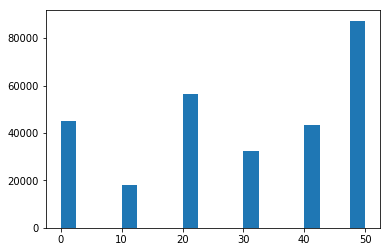

In [19]:
plt.hist(df['transport_code'][df['disp_problem_lvl']=='L1'], bins=20)
plt.show()

In [20]:
df['transport_mode'].unique()

array(['30-IV/No Medication', '50-Non Emergency', '20-IV/Medication',
       '40-BLS Status Transport', nan, '10-Acute/Medical Trauma'], dtype=object)

In [30]:
dfw = df[(df['transport_code'].isnull()==False) & (df['disp_problem_lvl'].isnull()==False) & 
         (df['latitude'].isnull()==False)       & (df['longitude'].isnull()==False) ]

In [31]:
dfw['response_date'] = dfw['response_date'].apply(lambda x: x.replace('.000', ''))
dfw['response_date'] = dfw['response_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time())
dfw['response_date'] = dfw['response_date'].apply(lambda x: x.hour+x.minute/60.)
dfw['response_date'].head(5)

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

0    16.233333
1    13.150000
2     8.483333
3    16.516667
4    19.516667
Name: response_date, dtype: float64

In [32]:
fist = dfw[['response_date', 'disp_problem_lvl', 'disp_determinant/medical_code']]

In [ ]:
fist['response_date'] = fist['response_date'].apply(lambda x: x)

In [26]:
tran = dfw['transport_code']

In [50]:
code_dict = {}
for code in list(fist['disp_determinant/medical_code'].unique()):
    if fist['disp_determinant/medical_code'][fist['disp_determinant/medical_code']==code].count() > 1000:
        code_dict[code] = fist['disp_determinant/medical_code'][fist['disp_determinant/medical_code']==code].count()
print(len(code_dict))

76


In [33]:
from sklearn.naive_bayes import MultinomialNB as MNB

In [34]:
mnb = MNB()

In [35]:
mnb.fit(fist, tran)

ValueError: could not convert string to float: '10C04'